<h1 align="center"> Predicting Churn for Bank Customers</h1>

Customer churn analysis is a way of understanding customer behaviour and heavily used in marketing departments of almost every business sector like telecom, banking, any subscriber based digital platforms etc. Churn rate is the proportion of customers who leave the supplier given a period of time. A customer can decide to leave the company for several reasons. For example, customer dissatisfaction, cheaper and/or better offers from the competition, more successful sales and/or marketing by the competition can be reasons for churn. (see <a href="https://en.wikipedia.org/wiki/Churn_rate#cite_note-3">Wikipedia</a>). Being able to determine churn rate of a customer segment is very important, because, with this findings, the supplier can find useful insights about customer trends and with this insights, the manager can make critical marketing desicions and prevent customer loss.

In this project, the business ploblem is to build a machine learning model which predicts whether a banking customer churns or stays.

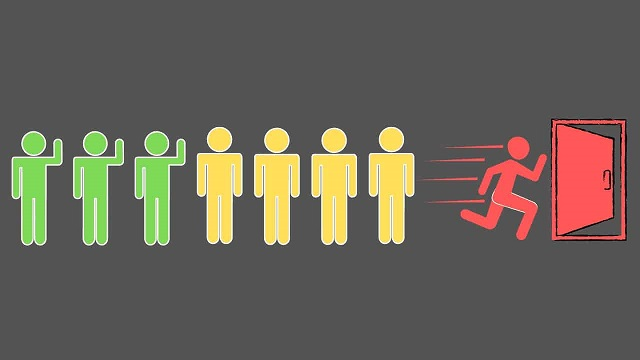
    <div style="text-align: CENTER">  </div>

## Table of Contents
* [Data](#first-bullet)
* [Exploratory Data Analysis (EDA)](#second-bullet)
* [Preprocessing](#third-bullet)
* [Outliers](#fourth-bullet)
* [Feature Engineering](#fifth-bullet)
* [ML Application](#sixth-bullet)
* [Evaluate & Compare the Models](#seventh-bullet)
* [Results & Ovesampling with SMOTE](#eighth-bullet)
* [Conclusion](#ninth-bullet)

## 1. Data  <a class="anchor" id="first-bullet"></a>

Churn analysis will be carried out with the data of 10.000 banking customers. The data source is <a href="https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data">Kaggle</a>.

Our churn data consists of 10000 instances (customers) and 13 independent features which are described below;


**RowNumber**: A unique identifier of sample          
**CustomerId**: A unique Identifier for the customer information.       
**Surname**: Surname of the customer   

**RowNumber**,**CustomerId**,**Surname** features will not be used for data analysis since they are unique to each customer.


1. **CreditScore**: Credit score of the customer. A value between 350 and 850       
2. **Geography**: Country of the customer. Data samples has 3 different countries; France, Spain or Germany         
3. **Gender**: Gender of the customer             
4. **Age**: Age of the customer                
5. **Tenure**: Length of the time customer with the Bank              
6. **Balance**: Balance of the customer            
7. **NumOfProducts**: Number of Bank Products of customers       
8. **HasCrCard**: Whether customer has credit card or not         
9. **IsActiveMember**: Whether customer is an active member or not    
10. **EstimatedSalary**: Customer's estimated salary    

**Exited**: The dependent variable will be predicted by the model. 1 means customer churns, 0 means customer stays. 

<div class="alert alert-block alert-info">
<b>Note:</b> Churn rate is the proportion of customers left the supplier given a period of time. However, our data, does not include the date column, so the "churn rate" term is used to indicate "Number of Churned Customers divided by the Total Number of Customers" only.
</div>

## 2. Exploratory Data Analysis (EDA) <a class="anchor" id="second-bullet"></a>

In [55]:
#!pip install folium
#!pip install geopy
#!pip install lightgbm
#!pip install xgboost
#!pip install imblearn

In [56]:
#Libraries are imported 
#EDA
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
import folium
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from geopy.geocoders import Nominatim
%matplotlib inline
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier,plot_importance 
#Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve, plot_confusion_matrix,auc,make_scorer
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve,roc_auc_score,roc_curve,make_scorer

In [57]:
#Load the data
df = pd.read_csv("Churn_Modelling.csv")

In [58]:
#get shape of data
df.shape

(10000, 14)

In [59]:
#describe the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [60]:
#get the data type of features and non-null numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
#no missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [62]:
#no duplicated values
df.duplicated().sum()

0

In [63]:
#dependent variable Exited value counts
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

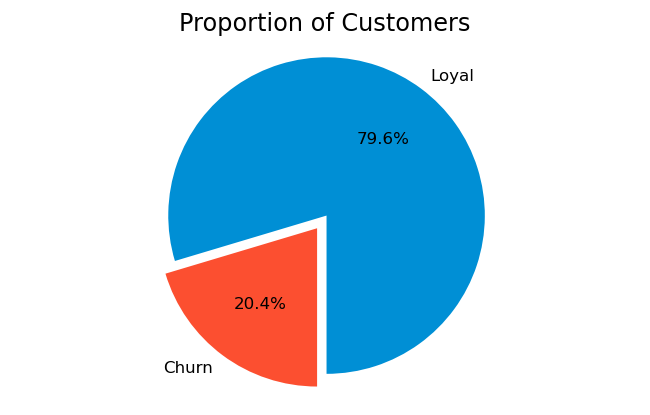

In [64]:
#dependent variable Exited value counts ploted in a pie chart
plt.figure(dpi=120)

explodeMeasure1 = [0, 0.1]

#Add shadows and rotate the plot 
plt.pie(df["Exited"].value_counts(), labels= ["Loyal","Churn"], 
        autopct='%0.1f%%', 
        explode = explodeMeasure1,
        startangle = -90)
plt.title("Proportion of Customers")
plt.axis("equal")

plt.show()

In [65]:
print(f"There are {len(df[df.Exited==1])} churn and {len(df[df.Exited==0])} loyal customers in the data")

There are 2037 churn and 7963 loyal customers in the data


> Data is highly imbalanced. Predicting churn customers is important to us. As it is seen from pie chart, predicting all customers as Loyal gives approximately %80 accuracy. For this reason, instead of accuracy, F1 score will be used for evaluations.

In [66]:
features = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

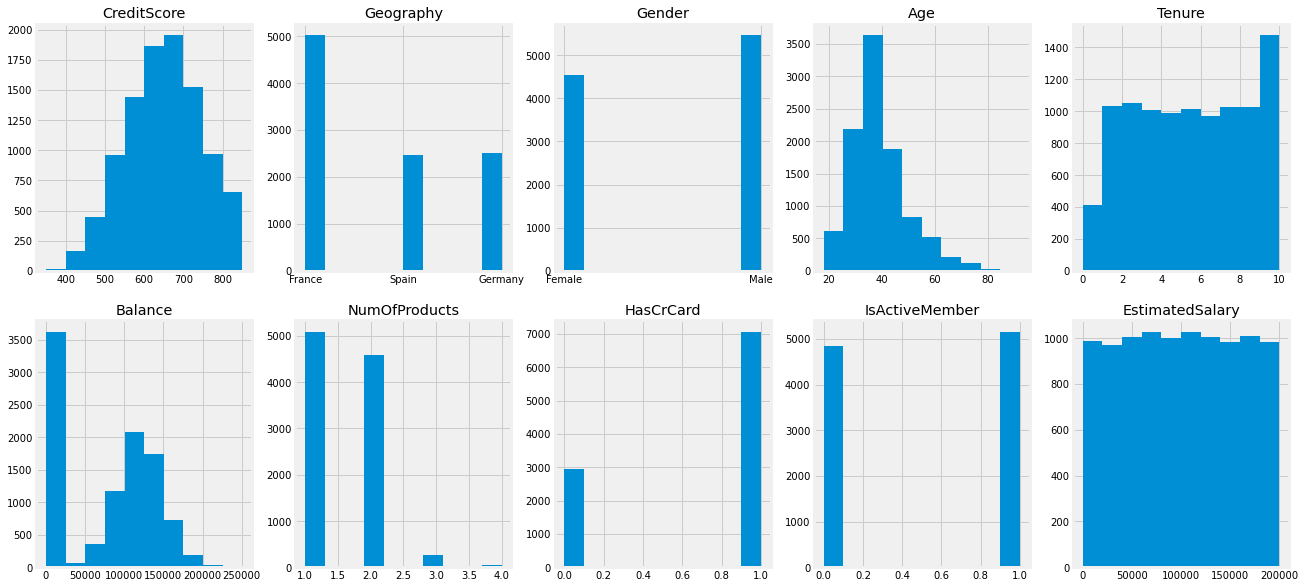

In [67]:
#plot feature histograms
fig, ax = plt.subplots(2,5,figsize=(20,10))
i=0;j=0
for c in features:
    ax[i,j].hist(df[c])
    ax[i,j].set_title(f"{c}")
    j = j+1;
    if j%5==0:
        i=i+1
        j=0

plt.show()



Age distribution is right-skewed, it seems there are a small number over-aged customer in data

Balance seems to be in normal distribution, if we drop 0 balanced customers. There are 3500 customers having 0 Balance on their accounts. 



> With this Balance distribution,  a new flag feature can be created named HasBalance. HasBalance can have 0 or 1 depending on balance being greater than 0 or not. However, this method, decreased all of the model scores, so I didn't apply it.


Now, let's analyze all of the attributes in more detail.

##### CreditScore

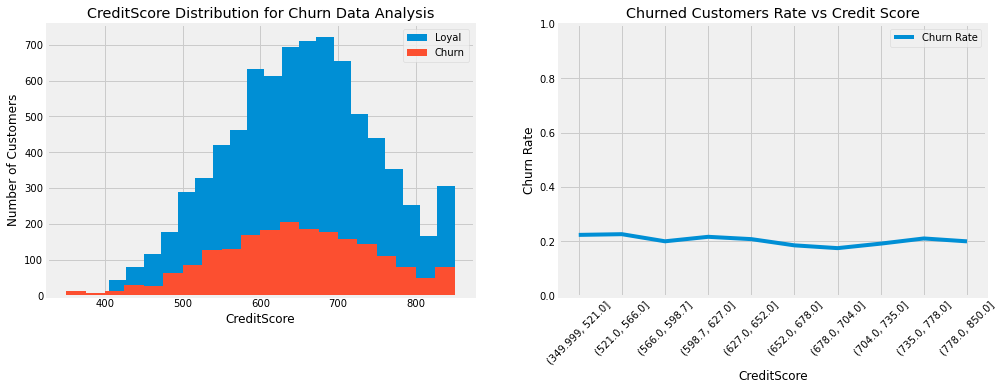

In [68]:
fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot histograms of Credit Score with respect to Exited values
ax[0,0].set_title("CreditScore Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'CreditScore'].hist(label='Loyal',bins=20,ax = ax[0,0])
df.loc[df['Exited']==1,'CreditScore'].hist(label='Churn',bins=20, ax = ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('CreditScore')
ax[0,0].set_ylabel('Number of Customers')

#plot churn rate over credit score intervals
score_bins= pd.qcut(df['CreditScore'], 10)
df.groupby(score_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_title("Churned Customers Rate vs Credit Score")
ax[0,1].legend(["Churn Rate"])
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].set_xticks(ticks=range(0,10),labels=score_bins.value_counts().index.sort_values(),rotation=45)
ax[0,1].set_ylim([0,1])

plt.show()

In [69]:
df.groupby(pd.qcut(df['CreditScore'], 10))["Exited"].agg(["count","mean","sum"])

,count,mean,sum
CreditScore,,,
"(349.999, 521.0]",1002,0.223553,224
"(521.0, 566.0]",1008,0.226190,228
"(566.0, 598.7]",990,0.200000,198
"(598.7, 627.0]",1030,0.216505,223
"(627.0, 652.0]",1005,0.207960,209
"(652.0, 678.0]",1005,0.185075,186
"(678.0, 704.0]",978,0.174847,171
"(704.0, 735.0]",1003,0.191426,192
"(735.0, 778.0]",998,0.210421,210


It can be seen that the churn distribution is quite similar to credit score distribution, it is seen from the line plots, the ups and downs of churn numbers are due to the magnitute of number of customers in that distribution. Churn rate is calculated as the number of churned customers divided by total number of customers. Credit Score is likely to have no effect on Churn.

> According to <a href= "https://www.investopedia.com/articles/personal-finance/081514/what-do-credit-score-ranges-mean.asp">investopedia</a>, Credit Scores, ranging between 0 and 850, can be divided into 5 segments as **Exceptional**, **Very Good**, **Good**, **Fair** and **Poor**, but when i convert credit score into these categories and apply macline learning algorithms, all scores are descreased. For this reason, I chose not to apply these conversion in final version.

##### Geography

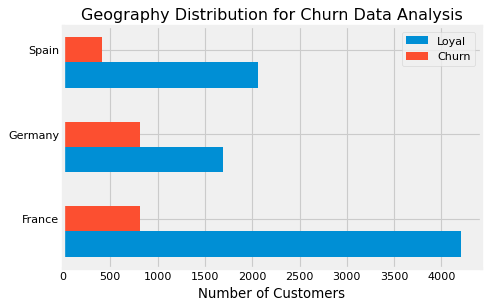

In [70]:
#plot histograms of Geography with respect to Exited values
plt.figure(dpi=80)
y = np.arange(3)
bin_height = 0.3
plt.title("Geography Distribution for Churn Data Analysis")
plt.barh(y,df.loc[df['Exited']==0,'Geography'].value_counts().sort_index(),height=bin_height,alpha=1,label="Loyal")
plt.barh(y+bin_height,df.loc[df['Exited']==1,'Geography'].value_counts().sort_index(),height=bin_height,alpha=1,label="Churn")
plt.xlabel("Number of Customers")
plt.yticks(y+bin_height, ["France","Germany","Spain"])
plt.legend()
plt.show()

In [71]:
country_churn = df.groupby("Geography")["Exited"].agg(["count","mean","sum"]).reset_index()

In [72]:
#get langtitude and latitude of countries by Nominatim service
geolocator = Nominatim(user_agent="MyApplication")

In [73]:
country_churn["Latitude"]= [geolocator.geocode(x)[1][0] for x in country_churn["Geography"] ]
country_churn["Longitude"]= [geolocator.geocode(x)[1][1] for x in country_churn["Geography"] ]

In [74]:
[geolocator.geocode(x) for x in country_churn["Geography"] ]

[Location(France, (46.603354, 1.8883335, 0.0)),
 Location(Deutschland, (51.0834196, 10.4234469, 0.0)),
 Location(España, (39.3260685, -4.8379791, 0.0))]

In [75]:
country_churn.head()

,Geography,count,mean,sum,Latitude,Longitude
0,France,5014,0.161548,810,46.603354,1.888334
1,Germany,2509,0.324432,814,51.083420,10.423447
2,Spain,2477,0.166734,413,39.326068,-4.837979


In [76]:
country_churn[['Latitude', 'Longitude']].mean().values.tolist()

[45.67094736666667, 2.4912671]

#### Customer Distribution in World Map

In [77]:
# Create a world map to show number of customers in that region 
#empty map
world_map = folium.Map(country_churn[['Latitude', 'Longitude']].mean().values.tolist())
#for each coordinate, create circlemarker of user percent
for i in range(len(country_churn)):
        lat = country_churn.iloc[i]['Latitude']
        long = country_churn.iloc[i]['Longitude']
        radius=int(country_churn.iloc[i]['count'])/100
        popup_text = """Country : {}<br>
                        Total Users : {}<br>
                        Churn Rate : {}<br>"""
        popup_text = popup_text.format(country_churn.iloc[i]['Geography'],
                                   country_churn.iloc[i]['count'],country_churn.iloc[i]['mean']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(world_map)
sw = country_churn[['Latitude', 'Longitude']].min().values.tolist()
ne = country_churn[['Latitude', 'Longitude']].max().values.tolist()
world_map.fit_bounds([sw, ne]) 
world_map 


> Most of the Bank customers are located  in France.  Germany has 0.32 average churn rate, and 814 churned customers. Followed by Germany, France has the second most churned customer numbers. However, average number of churn is 0.16 in France. So, we can say in Germany, there can be a country specific problem (insufficient infrastructure,  customer services etc.) which might cause customers to exist the Bank 

##### Gender

<Figure size 480x320 with 0 Axes>

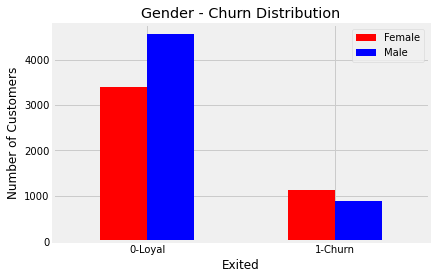

In [78]:
#plot the relationship between Gender and Exited 
plt.figure(dpi=80)
pd.crosstab(df.Exited,df.Gender).plot(kind="bar",color=["r","b"])

plt.title("Gender - Churn Distribution")
plt.ylabel("Number of Customers")
plt.legend();
plt.xticks([0,1],["0-Loyal","1-Churn"],rotation=0)
plt.show()

In [79]:
df.groupby("Gender")["Exited"].agg(["count","mean","sum"])

,count,mean,sum
Gender,,,
Female,4543,0.250715,1139
Male,5457,0.164559,898


From this graph, we can say that, Male customers are more loyal than female customers. Female customer churn rates are higher.

##### Age

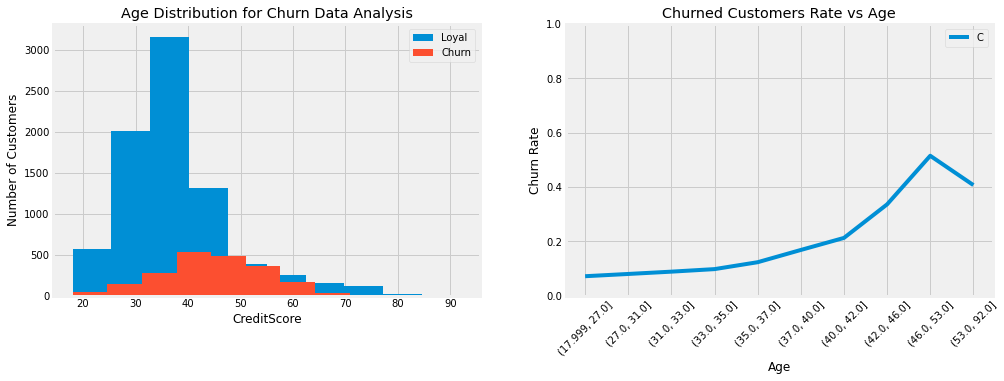

In [80]:
fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot histgram of age distributions of churn and loyal customers
ax[0,0].set_title("Age Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'Age'].hist(label='Loyal', ax=ax[0,0])
df.loc[df['Exited']==1,'Age'].hist(label='Churn', ax=ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('CreditScore')
ax[0,0].set_ylabel('Number of Customers')

#plot churn rate over age intervals
age_bins = pd.qcut(df['Age'], 10)
df.groupby(age_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_ylim([0,1])
ax[0,1].set_title("Churned Customers Rate vs Age")
ax[0,1].set_xticks(ticks=range(0,10),labels=age_bins.value_counts().index.sort_values(),rotation=45)
ax[0,1].legend("Churn Rate")
ax[0,1].set_ylabel("Churn Rate")

plt.show()

In [81]:
df.groupby(pd.qcut(df['Age'], 10))["Exited"].agg(["count","mean","sum"])

,count,mean,sum
Age,,,
"(17.999, 27.0]",1020,0.071569,73
"(27.0, 31.0]",1352,0.079882,108
"(31.0, 33.0]",860,0.088372,76
"(33.0, 35.0]",921,0.097720,90
"(35.0, 37.0]",934,0.123126,115
"(37.0, 40.0]",1332,0.168168,224
"(40.0, 42.0]",687,0.212518,146
"(42.0, 46.0]",1009,0.335976,339
"(46.0, 53.0]",919,0.514690,473


Age values shown in 10 percentiles. With this arangement,  most of the customer ages fall between 27 and 31. Customers, whose ages are between 46 and 53 are more likey to churn. As it is seen from the churn rate plot, when the age goes up, churn rates also increases until 53.

##### Tenure

Text(0, 0.5, 'Number of Customers')

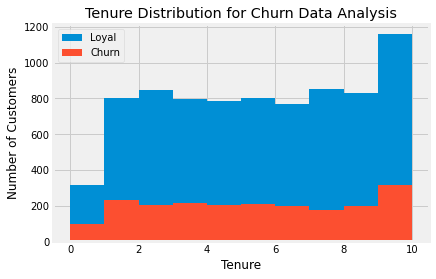

In [82]:
#plot histgram of tenure distributions of churn and loyal customers
plt.title("Tenure Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'Tenure'].hist(label='Loyal',bins=10)
df.loc[df['Exited']==1,'Tenure'].hist(label='Churn',bins=10)
plt.legend();
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')


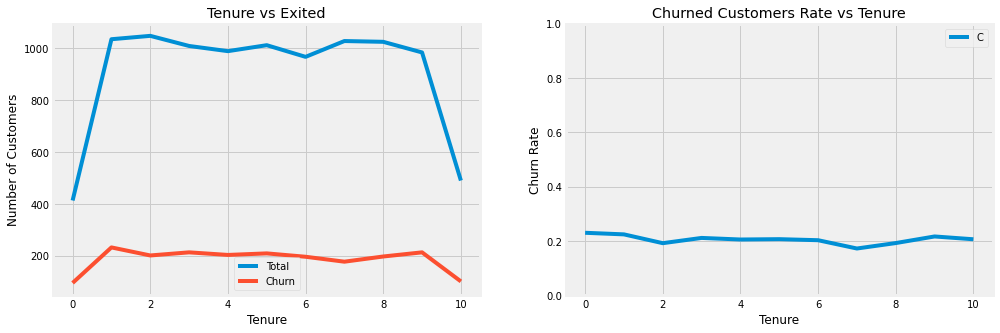

In [83]:

fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot number of churn and total customers over tenure
df.groupby(['Tenure'])["Exited"].agg(["count","sum"]).plot(ax=ax[0,0])
ax[0,0].legend(["Total","Churn"])
ax[0,0].set_title("Tenure vs Exited")
ax[0,0].set_ylabel("Number of Customers")

#plot churn rate over tenure
df.groupby(['Tenure'])["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_ylim([0,1])
ax[0,1].set_title("Churned Customers Rate vs Tenure")
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].legend("Churn Rate")

plt.show()

Tenure and churn distributions are quite similar. There is not a significant relation between Tenure and churn from this graph.

##### Balance

In [84]:
df.groupby(pd.cut(df['Balance'], 3))["Exited"].agg(["count","mean","sum"])

,count,mean,sum
Balance,,,
"(-250.898, 83632.697]",4353,0.151160,658
"(83632.697, 167265.393]",5262,0.242303,1275
"(167265.393, 250898.09]",385,0.270130,104


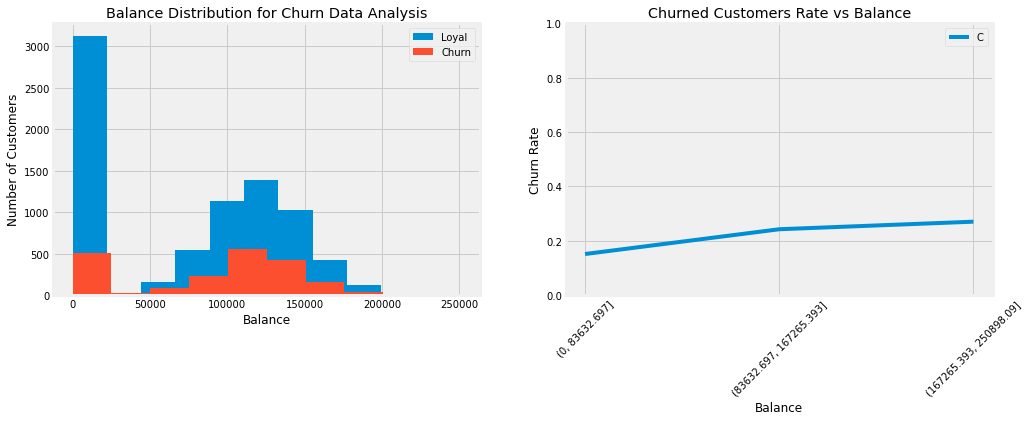

In [85]:
#plot histograms of Balance with respect to Exited values

fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

ax[0,0].set_title("Balance Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'Balance'].hist(label='Loyal',ax=ax[0,0])
df.loc[df['Exited']==1,'Balance'].hist(label='Churn',ax=ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('Balance')
ax[0,0].set_ylabel('Number of Customers')

#plot churn rate over 3 balance intervals
balance_bins = pd.cut(df['Balance'], 3)
df.groupby(balance_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_title("Churned Customers Rate vs Balance")
ax[0,1].set_ylim([0,1])
ax[0,1].set_xticks(ticks=range(0,3),labels=["(0, 83632.697]","(83632.697, 167265.393]","(167265.393, 250898.09]"],rotation=45)
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].legend("Churn Rate")
plt.show()

In [86]:
df.groupby(pd.cut(df['Balance'], 10))["Exited"].agg(["count","mean","sum"])

,count,mean,sum
Balance,,,
"(-250.898, 25089.809]",3623,0.139111,504
"(25089.809, 50179.618]",69,0.318841,22
"(50179.618, 75269.427]",360,0.222222,80
"(75269.427, 100359.236]",1173,0.192668,226
"(100359.236, 125449.045]",2081,0.268621,559
"(125449.045, 150538.854]",1747,0.244991,428
"(150538.854, 175628.663]",729,0.213992,156
"(175628.663, 200718.472]",186,0.231183,43
"(200718.472, 225808.281]",30,0.566667,17


In [87]:
print(f"{(df.query('Balance==0').shape[0]/df.shape[0])*100}% Customers have 0 Balance")

36.17% Customers have 0 Balance


Approximately 1/3 of customers have 0 balance, and most of them stay with the Bank. This is an alarming situation for the Bank.
If we exclude the customers with 0 balance, it is seen from the graph, balance and churn distribution are quite similar.

There is very few number of customers having Balance greater than 200.000 and among this customers most of them are churned. This can be interpreted as when balance increases then churn rate is also increase, bu this is not a correct interpretation. Since it is declared at the begining there is very few cutomers in that range. Churn rate plot line graph can be misinterpreted so i show the change of churn rate along with 3 balance intervals, but not 10.

##### NumOfProducts

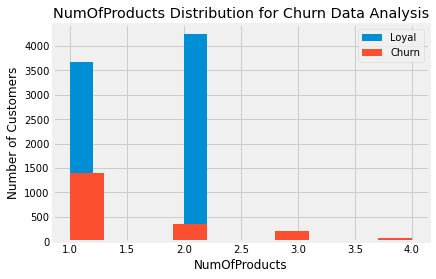

In [88]:
#plot histograms of NumOfProducts with respect to Exited values
plt.title("NumOfProducts Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'NumOfProducts'].hist(label='Loyal')
df.loc[df['Exited']==1,'NumOfProducts'].hist(label='Churn')
plt.legend();
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers')
plt.show()

In [89]:
df.groupby("NumOfProducts")["Exited"].agg(["count","mean","sum"]).sort_values(by="sum")

,count,mean,sum
NumOfProducts,,,
4,60,1.000000,60
3,266,0.827068,220
2,4590,0.075817,348
1,5084,0.277144,1409


Most of the customers have 2 products, then 1 products. Number of customers having 3 or 4 product is very low compared to 1 and 2.

Customers with only 1 product are more likely to churn.

##### HasCrCard

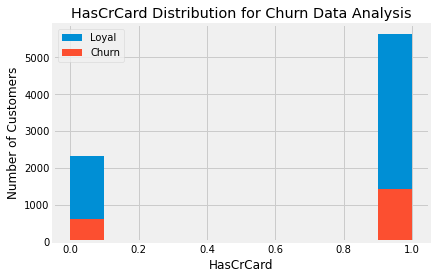

In [90]:
#plot histograms of HasCrCard with respect to Exited values
plt.title("HasCrCard Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'HasCrCard'].hist(label='Loyal')
df.loc[df['Exited']==1,'HasCrCard'].hist(label='Churn')
plt.legend();
plt.xlabel('HasCrCard')
plt.ylabel('Number of Customers')
plt.show()

In [91]:
df.groupby("HasCrCard")["Exited"].agg(["count","mean","sum"]).sort_values(by="sum")

,count,mean,sum
HasCrCard,,,
0,2945,0.208149,613
1,7055,0.201843,1424


Most of the customers have credit cards and for this reason, churn rates of customers with credit cards is slightly higher in the histograms. 

##### IsActiveMember

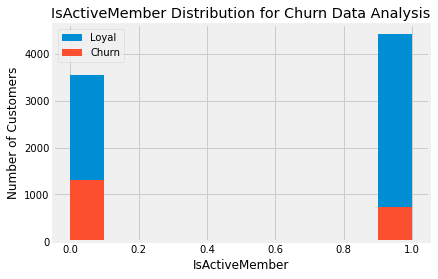

In [92]:
#plot histograms of IsActiveMember with respect to Exited values
plt.title("IsActiveMember Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'IsActiveMember'].hist(label='Loyal')
df.loc[df['Exited']==1,'IsActiveMember'].hist(label='Churn')
plt.legend();
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Customers')
plt.show()

In [93]:
df.groupby("IsActiveMember")["Exited"].agg(["count","mean","sum"]).sort_values(by="sum")

,count,mean,sum
IsActiveMember,,,
1,5151,0.142691,735
0,4849,0.268509,1302


As expected, active users are more loyal. (0.14<0.26). 

##### EstimatedSalary

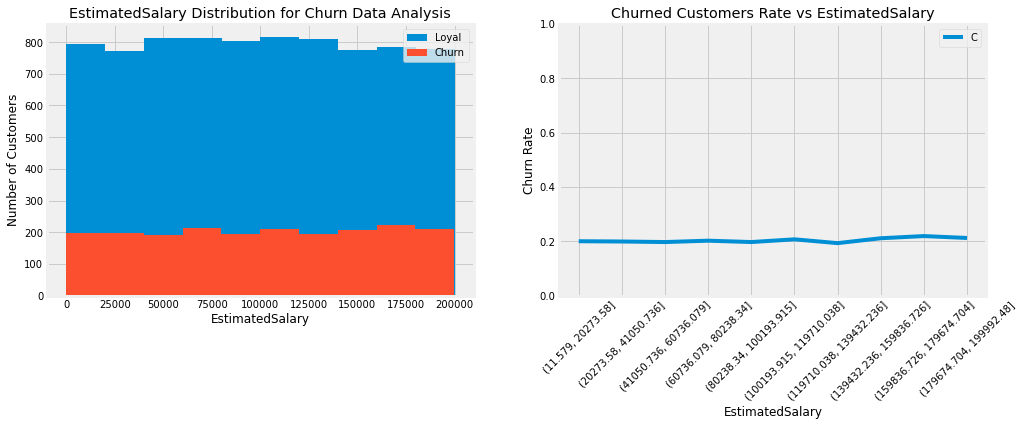

In [94]:
fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot histograms of EstimatedSalary with respect to Exited values
ax[0,0].set_title("EstimatedSalary Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'EstimatedSalary'].hist(label='Loyal',ax=ax[0,0])
df.loc[df['Exited']==1,'EstimatedSalary'].hist(label='Churn',ax=ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('EstimatedSalary')
ax[0,0].set_ylabel('Number of Customers')

salary_bin = pd.qcut(df['EstimatedSalary'], 10)

#plot churn rate over EstimatedSalary intervals
df.groupby(salary_bin)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_title("Churned Customers Rate vs EstimatedSalary")
ax[0,1].set_ylim([0,1])
ax[0,1].legend("Churn Rate")
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].set_xticks(ticks=range(0,10),labels=salary_bin.value_counts().index.sort_values(),rotation=45)

plt.show()

In [95]:
df.groupby(pd.qcut(df['EstimatedSalary'], 10))["Exited"].agg(["mean","sum"])

,mean,sum
EstimatedSalary,,
"(11.579, 20273.58]",0.200,200
"(20273.58, 41050.736]",0.199,199
"(41050.736, 60736.079]",0.197,197
"(60736.079, 80238.34]",0.202,202
"(80238.34, 100193.915]",0.197,197
"(100193.915, 119710.038]",0.207,207
"(119710.038, 139432.236]",0.193,193
"(139432.236, 159836.726]",0.211,211
"(159836.726, 179674.704]",0.219,219


Estimated salary distribution and churn distributions are quite similar. Also, as it is seen from the line plot, the churn rate does not change over estimated salary intervals. Estimated salary is not a clear evidence for churn and has not a effect on it according to the histogram and also the churn rate plot line graph. 


## 3- Preprocessing  <a class="anchor" id="third-bullet"></a>

In [96]:
#drop customer spesific features, 'RowNumber', 'CustomerId', 'Surname'
df_prep = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [97]:
#Convert Categorical features to numeric features
df_prep = pd.get_dummies(df_prep,drop_first=True)

In [98]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


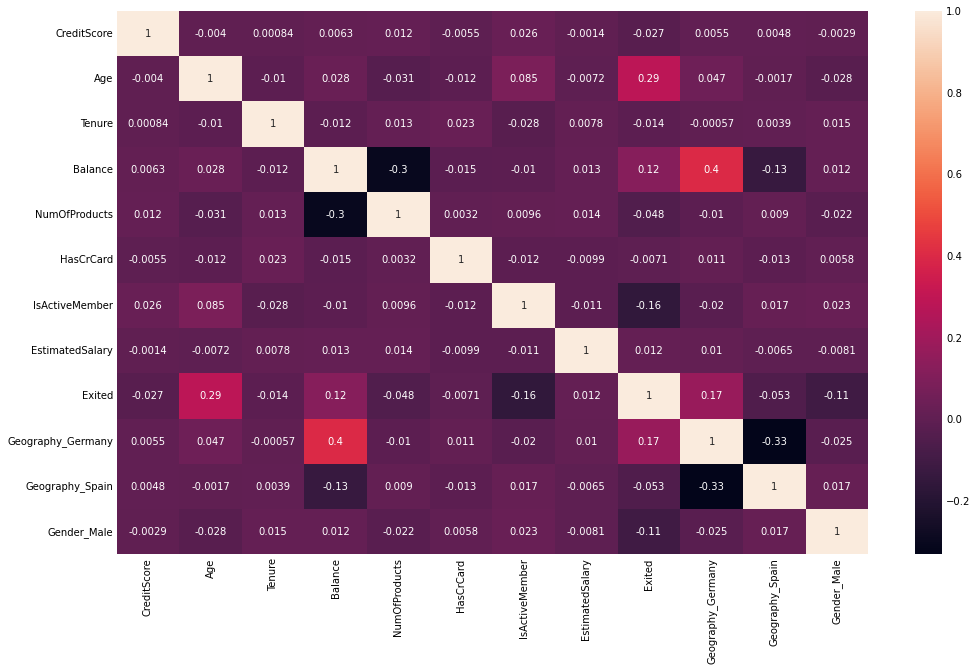

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(df_prep.corr(), annot=True)
plt.show()

> There is not any strong correlation between features.

Geography-Germany - Balance have 0.4 correlation. Customers from germany have slightly greater balance. This reult is interesting, because we saw that in Germany, customer churn rates are higher than other two countries. In Germany, customer has more balance and likely to churn. This indication is very important for the Bank. The Bank should immediately make Marketing desicions for this customers to make them stay with the Bank.

NumOfProducts - Balance have -0.3 correlation. This result is interesting,  because it seems there is not a positive correlation between balance and number of products customer owns.


In [100]:
df_prep.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

## 4 - Outliers  <a class="anchor" id="fourth-bullet"></a>

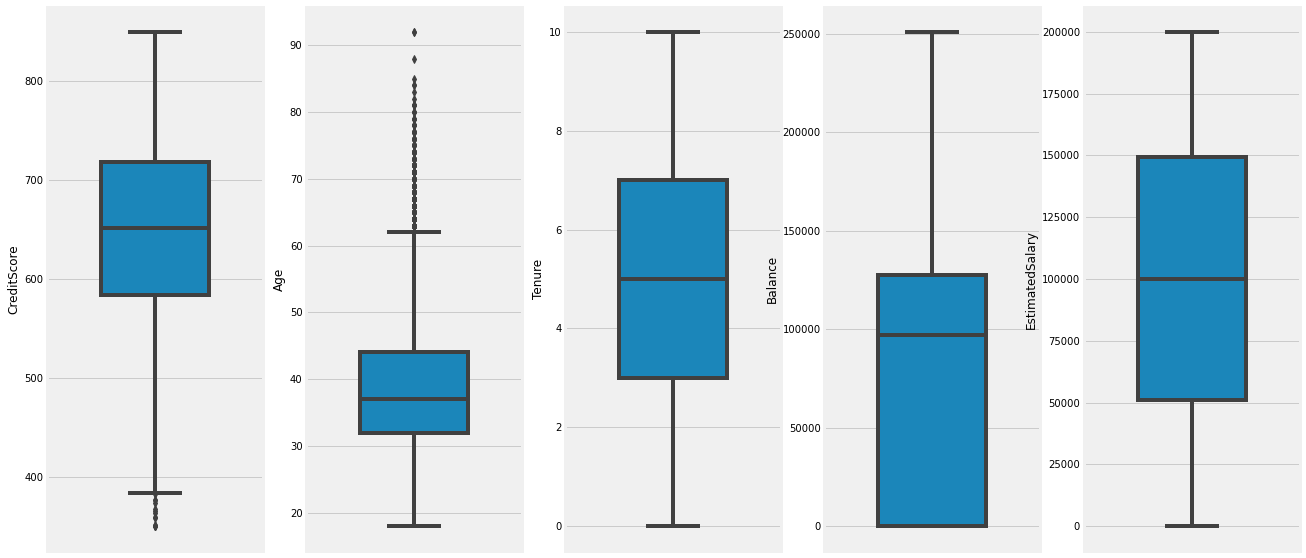

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,10),squeeze=False)

sns.boxplot(y ="CreditScore", data=df_prep,ax=ax[0,0],width=0.5)
sns.boxplot(y ="Age", data=df_prep,ax=ax[0,1],width=0.5 )
sns.boxplot(y ="Tenure", data=df_prep,ax=ax[0,2],width=0.5 )
sns.boxplot(y ="Balance", data=df_prep,ax=ax[0,3],width=0.5 )
sns.boxplot(y ="EstimatedSalary", data=df_prep,ax=ax[0,4],width=0.5 )

plt.show()

It is clearly seen from the boxplots that Age attribute has outliers greater than upper limit.
Credit Score also outliers lower than lower limit.

In [102]:
#import stats
import scipy.stats as stats

* Age

In [103]:
#find z distribution of Age
zscores = stats.zscore(df_prep["Age"])

In [104]:
#find the outliers bigger than upper limit (whise z-score is greater than 3)
df_prep.loc[np.where(np.abs(zscores)>3)[0],"Age"] 

85      75
158     73
230     72
252     79
310     80
        ..
9646    71
9671    78
9736    78
9894    77
9936    77
Name: Age, Length: 133, dtype: int64

In [105]:
#find the mean of outliers, which will be the new upper limit 
df_prep.loc[np.where(np.abs(zscores)>3)[0],"Age"].mean()

74.81954887218045

In [106]:
#eliminate outlier age values by replacing them their average
df_prep.loc[np.where(np.abs(zscores)>3)[0],"Age"] = df_prep.loc[np.where(np.abs(zscores)>3)[0],"Age"].mean()

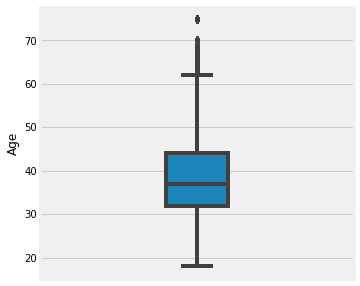

In [107]:
#re-plot the boxplot of Age
plt.figure(figsize=(5,5))
sns.boxplot(y="Age",data= df_prep,width=0.2);plt.show()
plt.show()

* CreditScore

According to z-score analysis results, Credit scores having z-score lower than -3 as follows. I will not remove these samples or modify it. This coluld be a business domain question.

In [108]:
zscores_cs = stats.zscore(df_prep["CreditScore"])

In [109]:
#lower outlier CreditScore values found with z-score 
df_prep.loc[np.where(zscores_cs<-3)[0],"CreditScore"]

1405    359
1631    350
1838    350
1962    358
2473    351
8723    350
8762    350
9624    350
Name: CreditScore, dtype: int64

## 5 - Feature Engineering <a class="anchor" id="fifth-bullet"></a>

#### NumofProducts

NumofProducts has 4 different values, but there are little amount of instances having 3-4 NumofProducts , so we add them to 2. 

NumofProducts values become  1 and 2 (more than 1)

In [110]:
#Distribution of NumOfProducts values
df_prep.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [111]:
df_prep.NumOfProducts = df_prep.NumOfProducts.map(lambda x: 2 if x>2 else x)

In [112]:
#Distribution of the new NumOfProducts values after modifying
df_prep.NumOfProducts.value_counts()

1    5084
2    4916
Name: NumOfProducts, dtype: int64

#### Estimated Salary

Convert annual salary to monthly salary. This manipulation is nothing but a simple normalization.

In [113]:
df_prep.EstimatedSalary = df_prep.EstimatedSalary/12

### Test Train Split

In [114]:
y = df_prep["Exited"]
X = df_prep.drop(["Exited"], axis=1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify =y, shuffle=True) 

In [116]:
X_train.shape

(8000, 11)

In [117]:
X_test.shape

(2000, 11)

### Feature Scaling

In [118]:
scaler = StandardScaler()

In [119]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [120]:
X_test_scaled = scaler.transform(X_test); 

## 6 - ML Application <a class="anchor" id="sixth-bullet"></a>

In this phase, 5 classification machine learning algorithms will be used to predict the customer churn. Since the data is highly imbalanced, F1 score will be used to evaluate the model success rather than default scoring method, accuracy.

1. Logistic Regression

2. KNN Classifier

3. Random Forest Classifier

4. XGBoost Classifier

5. Light Gradient Boosting Classifier


In [121]:
#make scorer as f1_score to use for validation scoring method
scorer = make_scorer(f1_score)

In [122]:
#define a function that takes inputs model and parameter, search for best parameters with X_train_scaled,y_train and print results
def search_best_parameters(model,params,scorer=scorer):
    model_search = GridSearchCV(model, params,scoring=scorer)
    model_search.fit(X_train_scaled, y_train)
    print("Best parameter (CV score=%0.3f):" % model_search.best_score_)
    print(model_search.best_params_)

### 1- Logistic Regression

In [123]:
logreg = LogisticRegression()
scoreCV_log = cross_val_score(logreg, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_log.mean()

0.36064012583580113

### 1.1 -Tuning Logistic Regression

In [124]:
log_params = {
    "C" : [0.001,0.01,0.1,1,10,100,1000,10000],
    "penalty" : ['l1','l2'],
    "solver" : ['liblinear'],
    "max_iter":[100,200,1000]
}

In [125]:
logistic = LogisticRegression()
search_best_parameters(logistic,log_params)

Best parameter (CV score=0.361):
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [126]:
best_logreg = LogisticRegression(C= 1, max_iter=100, penalty= 'l1', solver= 'liblinear')

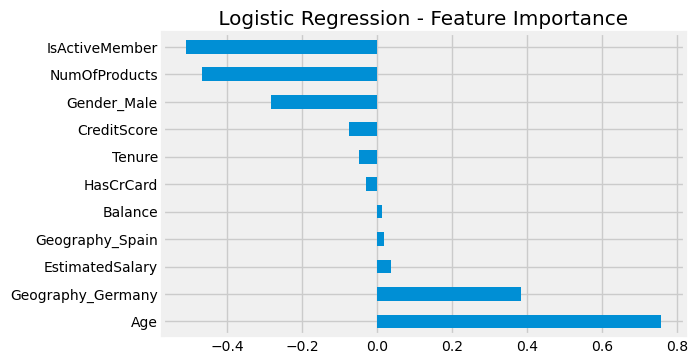

In [127]:
best_logreg.fit(X_train_scaled,y_train)
logco = pd.Series(best_logreg.coef_[0],index=X_train.columns).sort_values(ascending=False);logco
plt.figure(dpi=100)
plt.title(" Logistic Regression - Feature Importance ")
logco.plot(kind="barh")
plt.show()

### 2- KNN Classifier

In [128]:
knn = KNeighborsClassifier()
scoreCV_log = cross_val_score(knn, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_log.mean()

0.4034940680954259

### 2.1 -Tuning KNN Classifier

In [129]:
knn_params = {
    "n_neighbors" : np.arange(2,7),
}

In [130]:
knn_tuned = KNeighborsClassifier(n_jobs =-1)
search_best_parameters(knn_tuned,knn_params)

Best parameter (CV score=0.414):
{'n_neighbors': 3}


In [131]:
best_knn = KNeighborsClassifier(n_neighbors= 3, n_jobs =-1 )

### 3- RandomForest Classifier

In [132]:
rfc = RandomForestClassifier()
scoreCV_RF_scaled = cross_val_score(rfc,X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_RF_scaled.mean()

0.4943795756847442

### 3.1- Tuning Random Forest Classifier Model

In [133]:
rfc_params = {
    "n_estimators":[200,500,700],
    "max_depth":[2,10,100],
    "min_samples_split":[2,3,5],
    "ccp_alpha":[0.0001,0.5,1] ,
    "max_samples":[1000,500, None]
}

In [134]:
rfc = RandomForestClassifier(n_jobs=-1)
search_best_parameters(rfc,rfc_params)

Best parameter (CV score=0.502):
{'ccp_alpha': 0.0001, 'max_depth': 100, 'max_samples': None, 'min_samples_split': 5, 'n_estimators': 200}


In [172]:
best_rfc = RandomForestClassifier(ccp_alpha= 0.0001, 
                                  max_depth= 100, 
                                  max_samples= None, 
                                  min_samples_split= 5,
                                  n_estimators= 200,
                                  n_jobs =-1)

### 4- XGBoost Classifier

In [136]:
xgboost = XGBClassifier()
scoreCV = cross_val_score(xgboost, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV.mean()

0.5100214389278768

### 4.1- Tuning XGBoost Classifier

The churn data set is highly imbaanced, so **scale_pos_weight** parameter is added to grid search method for tuning.

In [137]:
#calculate scale pos weight parameter (count of negative class/count of positive class)
weight = (y.value_counts()[0]/y.value_counts()[1])

In [138]:
weight

3.9091801669121256

<div class="alert alert-block alert-info">
<b>Note:</b> Scale pos weight parameter controls the balance of positive and negative weights, useful for unbalanced classes. Generally it is set as the ratio of the number of negative class to the positive class, which is 3.9 for our data set. Default value of scale pos weight is 1. (See <a href="https://stats.stackexchange.com/questions/243207/what-is-the-proper-usage-of-scale-pos-weight-in-xgboost-for-imbalanced-datasets"> source)</a>
</div>

In [139]:
xgb_params = {
    "n_estimators":[100,200,500],
    "max_depth":[4,6],
    "eta":[0.01,0.3],
    "gamma":[0.1,0.01],
    "scale_pos_weight":[1,3.9] ##1 is default value and the 3.9 is ratio of negative class to positive class 
    
}

In [140]:
xgbc = XGBClassifier(n_jobs=-1)
search_best_parameters(xgbc,xgb_params)

Best parameter (CV score=0.564):
{'eta': 0.01, 'gamma': 0.1, 'max_depth': 6, 'n_estimators': 500, 'scale_pos_weight': 3.9}


In [171]:
best_xgb = XGBClassifier(eta= 0.01, gamma= 0.1, max_depth= 6, n_estimators= 500,scale_pos_weight= 3.9, n_jobs=-1)

### 5- Light Gradient Boosting Classifier

In [142]:
lgbc = LGBMClassifier()
scoreCV = cross_val_score(lgbc, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV.mean()

0.5128525821431866

### 5.1- Tuning Light Gradient Boosting Classifier

In [143]:
xgb_params = {
    "num_leaves":[31,40,50],
    "max_depth":[2,4],
    "learning_rate":[0.1,0.5],
    "n_estimators":[100,200]
}

In [144]:
lgbc = LGBMClassifier(n_jobs=-1)
search_best_parameters(lgbc,xgb_params)

Best parameter (CV score=0.520):
{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100, 'num_leaves': 31}


In [145]:
best_lgb = LGBMClassifier(learning_rate= 0.5, max_depth = 2, n_estimators = 100, num_leaves = 31,n_jobs=-1)

## 7- Evaluate & Compare the Models <a class="anchor" id="seventh-bullet"></a>

In [173]:
def plot_conf_mat(y_true, y_preds,modelname):
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_true, y_preds),
                     annot=True,
                     cbar=False,fmt="d")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix of "+modelname)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [174]:
def evaluate_models (models,X_train,y_train,X_val,y_val):
    for name,model in models.items():
        print(f"-------"+name+"---------")
        model.fit(X_train,y_train)
        y_pred = model.predict(X_val)
        plot_conf_mat(y_val,y_pred,name)
        print(classification_report(y_val,y_pred))

In [175]:
def plot_roc_curves(models,X_train,y_train,X_val,y_val):
    
    #set up plotting area
    plt.figure(dpi=150)
    plt.title("ROC Curves of ML Models")
    
    for name,model in models.items(): 
        
        #fit the model with training data set
        model.fit(X_train,y_train)
        #Plot the ROC curves
        y_pred = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_pred)
        auc = round(roc_auc_score(y_val, y_pred), 4)
        plt.plot(fpr,tpr,label=name+", AUC="+str(auc))
        
        #add legend
        plt.legend(loc= "center left",  bbox_to_anchor=(1, 0.5))


In [176]:
def compare_models(models,X_train, y_train): 
    results=[]
    names=[]
    for name, model in models.items():
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
        results.append(cv_results)
        names.append(name)
       
        # boxplot algorithm comparison
    plt.figure(dpi=100)
    plt.title('ML Models Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    plt.xticks(ticks = list(range(1,len(names)+1)) ,labels = names, rotation = 'vertical')
    plt.show()

In [177]:
models={
    "Logistic Regression": best_logreg,
    "KNN Classifier" : best_knn,
    "Random Forest Classifier": best_rfc,
    "XGBoost Classifier": best_xgb,
    "Light Gradient Boosting": best_lgb    
}


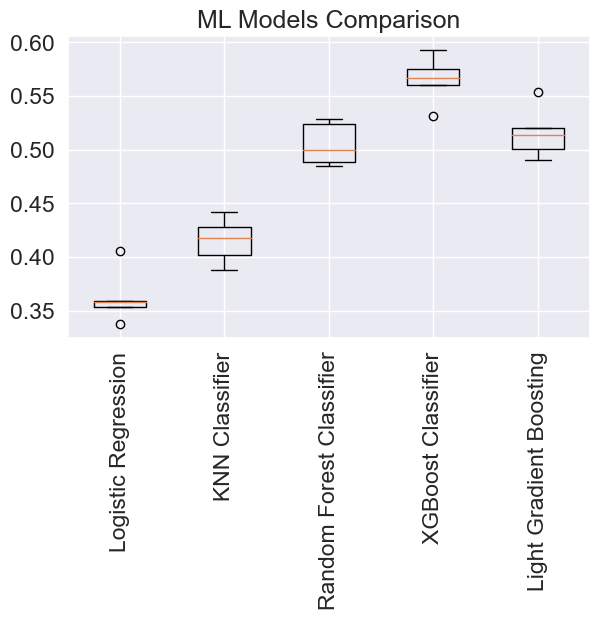

In [178]:
#plot boxplots to visualize tuned models' cross validation scores 
compare_models(models,X_train_scaled,y_train)

Above boxplots show, tuned models' cross validation F1 scores. Tuned XGBoost Classifier is clearly performed better than others. 

Before moving forward, to investigate False Nagative numbers (number of samples which is found not churned , but actually churned) found by each model, we must fit the model with training set and predict test/validation set. Since we have not prepared our model, we can not use the test data yet. For this reason, train set is splitted to train and validation sets.

### Create Validation Data Set for Comparing Models

In [179]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train_scaled,y_train,test_size=0.2,stratify=y_train,random_state=0,shuffle=True)

In [180]:
X_val.shape

(1600, 11)

In [181]:
X_train_v.shape

(6400, 11)

-------Logistic Regression---------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1274
           1       0.60      0.24      0.34       326

    accuracy                           0.81      1600
   macro avg       0.72      0.60      0.62      1600
weighted avg       0.79      0.81      0.78      1600

-------KNN Classifier---------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1274
           1       0.49      0.31      0.38       326

    accuracy                           0.79      1600
   macro avg       0.66      0.61      0.63      1600
weighted avg       0.77      0.79      0.78      1600

-------Random Forest Classifier---------
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1274
           1       0.72      0.33      0.45       326

    accuracy                           0.84      1600
   macro avg       0

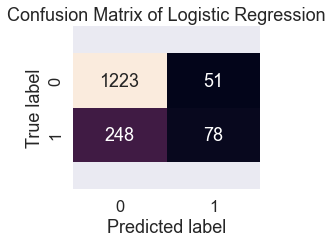

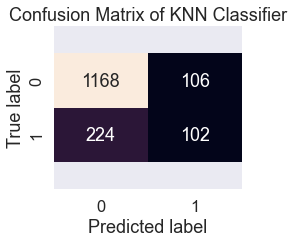

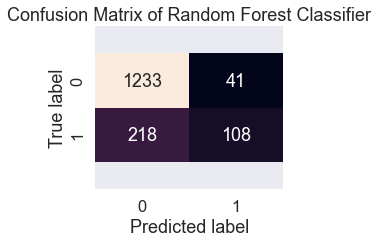

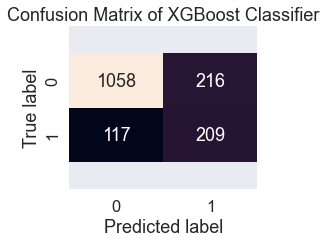

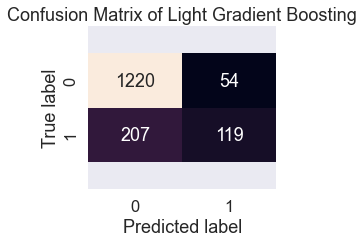

In [182]:
#get classification reports and confusion matrices for each model
evaluate_models(models,X_train_v, y_train_v, X_val, y_val)

Minimum False Negative number is 117 and it results from XGBoost Classifier. Maximum recall and recall scores are also belongs to XGBoost Classifier.

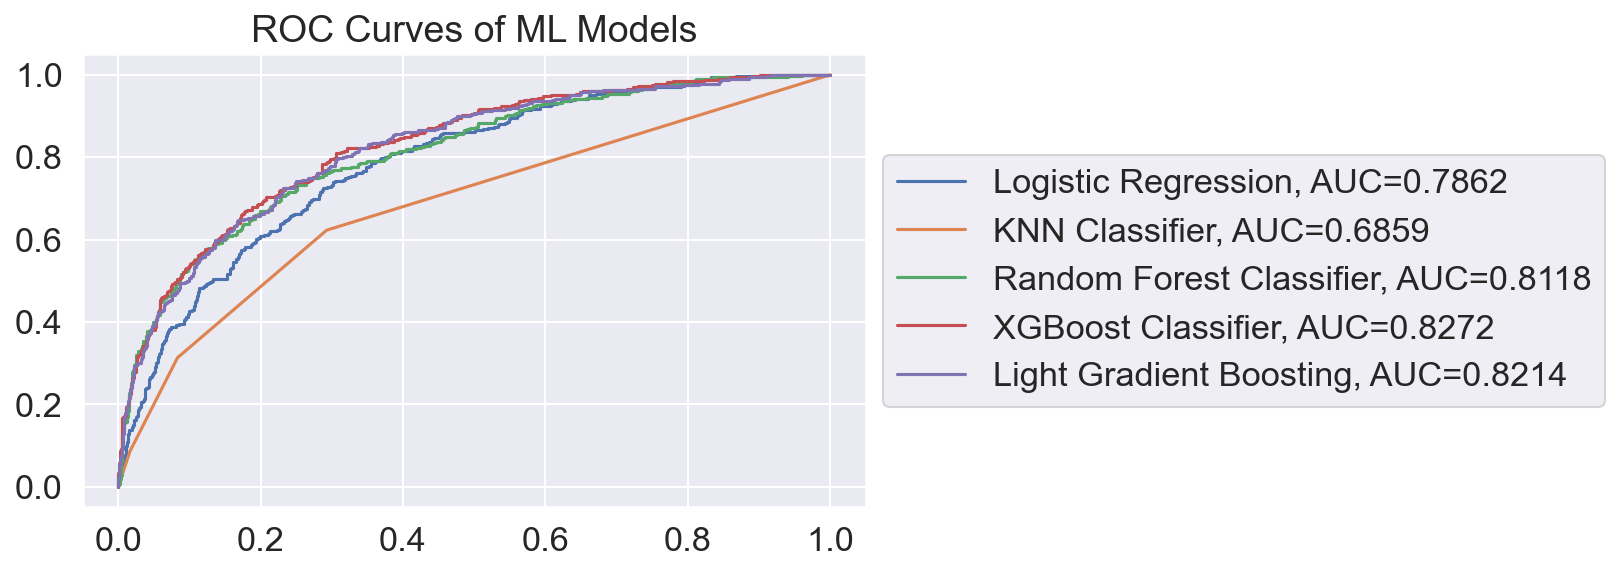

In [183]:
#plot roc curves of ML models fitted with train model
plot_roc_curves(models,X_train_v, y_train_v, X_val, y_val)

From ROC Curves, XGBoost Classifier and Light GBM are the most successfull 2 models. (AUC, area under scores of these 2 models are very close with each other)

Our business problem is to predict the churned customers correctly. Hence, maximazing the number of True Positive samples, and minimazing the False Negative are the main aim. XGBoost is the winner for providing this goal.

## 8 - Results & Oversampling with SMOTE  <a class="anchor" id="eighth-bullet"></a>

According to our analysis in previous chapters, XGBoost is found to be the best model for this data analysis.

Now, train the final model with the full train set, and predict the results against test set and train set.

In [184]:
xgb_classifier = XGBClassifier(eta= 0.01, gamma= 0.1, max_depth= 6, n_estimators= 500,scale_pos_weight= 3.9, n_jobs=-1,random_state=0)

In [185]:
xgb_classifier.fit(X_train_scaled,y_train)
pred_train = xgb_classifier.predict(X_train_scaled)#prediction with train set is made for checking overfitting only
pred_test = xgb_classifier.predict(X_test_scaled)

In [186]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1593
           1       0.46      0.66      0.55       407

    accuracy                           0.78      2000
   macro avg       0.68      0.73      0.70      2000
weighted avg       0.81      0.78      0.79      2000



In [187]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6370
           1       0.57      0.82      0.68      1630

    accuracy                           0.84      8000
   macro avg       0.76      0.83      0.79      8000
weighted avg       0.87      0.84      0.85      8000



Our model's train set scores are slightly higher than test set scores. This can be a sign of overfitting. But, more importantly, recall and f1 scores of test set are not so good; 

* Train set recall score is  0.82, 

* Test set **Recall Score is 0.66**



* Train set f1 score is 0.68, 

* Test set **F1 Score is 0.55**

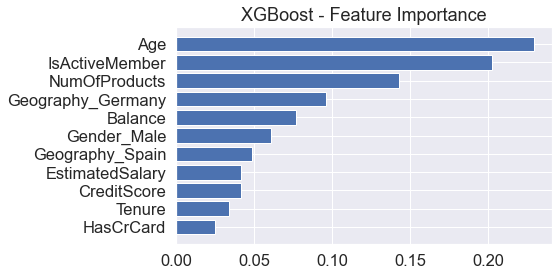

In [213]:
# plot feature importance
plt.title(label="XGBoost - Feature Importance")
sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_classifier.feature_importances_[sorted_idx])
plt.show()

According to feature importance barplot above, Age,IsActiveMember and NumOfProducts are the most important features. SMOTE generate new samples in by interpolation.

#### SMOTE

The Synthetic Minority Oversampling Technique (SMOTE) is one of the two popular methods to over-sample minority classes with  ADASYN. (see <a href= https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn)>sklearn documentation</a> ). In this section, we try to overcome overfitting problem and to decrease False Negative numbers by increasing the number of samples by **SMOTE** method

In [198]:
#import SMOTE 
from imblearn.over_sampling import SMOTE

In [189]:
oversample = SMOTE()

In [199]:
#oversample the training set
X_over, y_over = oversample.fit_resample(X_train_scaled, y_train)

In [191]:
#negative and positive classes are equal now!
y_over.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [201]:
#cross validate by oversampled data sets
scoreCV = cross_val_score( XGBClassifier(n_jobs=-1,random_state=0), X_over, y_over, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV.mean()

0.8694772886071378

Cross validation score is increased noticably! (It was 0.56 with the orginal train set)

Now, tune the model with over sampled data. Since data is balanced now, scale_pos_weight is not in the parameter search.

In [216]:
xgb_params_smote = {
    "n_estimators":[100,200,500],
    "max_depth":[4,6],
    "eta":[0.01,0.3],
    "gamma":[0.1,0.01],
}

xgbc_smote = XGBClassifier(n_jobs=-1)
model_search = GridSearchCV(xgbc_smote, xgb_params_smote,scoring=scorer)
model_search.fit(X_over, y_over)
print("Best parameter (CV score=%0.3f):" % model_search.best_score_)
print(model_search.best_params_)

Best parameter (CV score=0.844):
{'eta': 0.01, 'gamma': 0.1, 'max_depth': 6, 'n_estimators': 500}


In [207]:
best_model_smote = {"XGBoost with SMOTE":XGBClassifier(eta= 0.01, gamma= 0.1, max_depth= 6, n_estimators= 500,n_jobs=-1,random_state=0)}

-------XGBoost with SMOTE---------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1593
           1       0.56      0.54      0.55       407

    accuracy                           0.82      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.82      0.82      0.82      2000



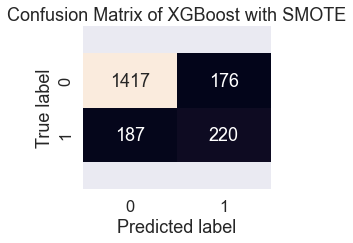

In [208]:
#prediction results with oversampled-balanced data with respect to test data
evaluate_models(best_model_smote,X_over, y_over,X_test_scaled, y_test)

**Recall (with SMOTE):0.54, F1-score (with SMOTE) is 0.55**

## 9 -  Conclusion <a class="anchor" id="ninth-bullet"></a>

We analyzed Churn Data Set, consisting of 10000 instances and 10 attributes. 

In Exploratory Data Analysis section, most important findings are as follows;

* Senior customers (age between 47-55) are more likely to churn. The bank can present special offers for this age to prevent churn.
* Inactive customers are more likely to exit the Bank. When customers do not make any financial transactions in a given preiod of time, a scheduled notification can be sent to the customer. The notification can be about the latest campaigns for his/her segment.
* Female customers are also have greater churn rates than Male customers.
* In Germany, customers are more likely to churn. The bank can investigate whether there is a problem causing customers to leave the Bank more than other two countries. Also, customers in Germany have more balance, so The Bank should prioritize to solve this issue.
* Customers having less number of products are more likely to churn.
* Estimated Salary, Tenure and Credit Score features do not have significant effect on churn results.

In ML Apllications section, I used 
* Logistic Regression, 
* KNN, 
* Random Forest, 
* XGBoost and 
* LGB Classifiers to predict the churn. Since data is highly imbalanced(%80 loyal-%20churn) F1 score is used as the scorer for cross validation and grid search methods. 

LogisticRegression is the most interpretable model, According to LogisticRegression Model coefficients, most important features effecting customer churn are as follows, 

* IsActiveMember (- Effects churn negatively)
* NumOfProducts (- Effects churn negatively)
* Age (+)

**XGBoost Classifier with the parameters, eta= 0.01, gamma= 0.1, max_depth= 6, n_estimators= 500,scale_pos_weight= 3.9, is found to be the most successfull model** with the highest F1 and recall scores. 

Like LogisticRegression, XGBoost Classifier also found the features,

* Age
* IsActiveMember
* NumOfProducts

as the strongest features efecting churn.

XGBoost Classifier test set results are slightly lower than train set results, this can be a sign of overfitting. Also, recall and F1 scores are not so great (Recall:0.66, F1:0.55). This shows that model is actually not good at finding churned customers. To deal with overfitting and increase the recall scores, i tried to use over sampling method to increase the number of samples. SMOTE method is used for this purpose. XGBoost Classifier is fitted with Over sampled train data and model's cross validation score increased noticable. However, after prediction with test, we see that, F1 score is remained as 0.55, and recall score is decreased to 0.54. 

